In [34]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(f'Shape of our data is: {data.shape}')

Shape of our data is: (42000, 785)


We have 42K data points and 784 columns (excluding 'label' column). Our images are 28x28 pixel and each column gives us pixel for oe column

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Notice that many columns don't contain anything but 0. We can try removing these columns and check the accuracy of our models.

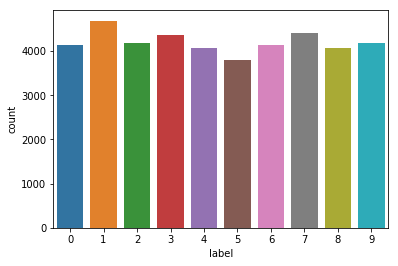

In [6]:
sns.countplot(data['label'], label="Count")

We have a fairly balanced dataset here.

In [7]:
y = data['label']
X = data.drop('label', axis=1)

## Displaying an image

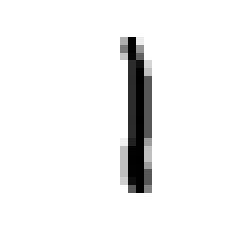

In [8]:
digit = X.iloc[1000, :]
plt.imshow(digit.values.reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [9]:
print(f'Label of this image is: {y[1000]}')

Label of this image is: 1


So label is matching the image displayed. So far so good.

## Binary Classifier

We'll start by training a binary classifier. We train a model to classifiy images as '1' or 'Not 1'

In [10]:
y_1 = (y == 1)

### SGD Classifier

In [11]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([digit])

array([ True])

Our 1/Not 1 classifier predicts our 'digit' as True. We already know that our digit was 1, so our classifier is working good.

#### Accuracy

In [13]:
scores = cross_val_score(sgd_clf, X, y_1, cv=5, scoring="accuracy")
print(f'Accuracy: {np.mean(scores)}')

Accuracy: 0.9868568394729873


We've achieved 98.68% accuracy on our train data. Should we be happy? Hold on.

In [14]:
percent_1_data = np.sum(y_1) / len(y)
print(f'Percent of total data which belongs to class 1: {percent_1_data*100}%')

Percent of total data which belongs to class 1: 11.152380952380952%


This means if we have a dumb classifier which classifies all data points as 'Not 1', it will also acieve ~89% accuracy. I bet 98% accuracy does not sound too good now.

When we consider this binary classification usecase, our dataset is pretty skewed. Only 11% of data points belong to our positive class. For such skewed data sets (or imbalanced datasets) we don't consider accuracy to be a very good performance metric. We should consider other metrics as well.

#### Confusion Matrix

In [15]:
y_1_pred = cross_val_predict(sgd_clf, X, y_1, cv=5)
confusion_matrix(y_1, y_1_pred)

array([[36898,   418],
       [  134,  4550]])

This gives us a much better picture of how our classifier is performing. It wrongly classifies <b> 418 data points which were not 1 as 1 </b> and also wrongly classifies <b> 134 data points which were 1 as not 1 </b>

#### Precison and Recall

In [16]:
print(f'Precision score for our classifier: {precision_score(y_1, y_1_pred)}')
print(f'Recall score for our classifier: {recall_score(y_1, y_1_pred)}')
print(f'F1 score for our classifier: {f1_score(y_1, y_1_pred)}')

Precision score for our classifier: 0.9158615136876006
Recall score for our classifier: 0.9713919726729291
F1 score for our classifier: 0.9428097803564027


1. Precision score tells us that when our classifier says '1' for any image, it is only correct 91% of the time
2. Recall score tells us that of total images that are '1', our classifier picks 97% images which is a good sign
3. F1-Score is just a harmonic mean of precision and recall

#### Precision-Recall Tradeoff

In [17]:
y_scores = cross_val_predict(sgd_clf, X, y_1, cv=5, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_1, y_scores)

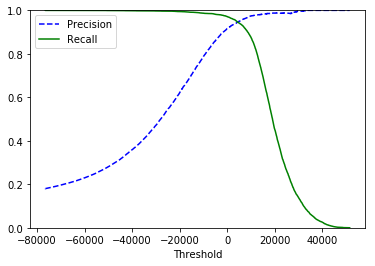

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

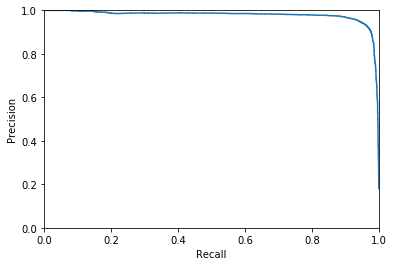

In [19]:
plt.plot(recalls, precisions)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.show()

These curves show how our precision and recall values vary for different thresholds and now we can choose an appropriate value of threshold for our model which gives us best values for both precision and recall.

#### ROC Curve

In [20]:
fpr, tpr, thresholds = roc_curve(y_1, y_scores)

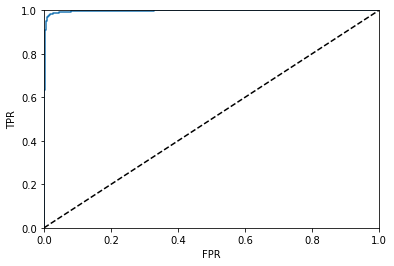

In [21]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.show()

In [22]:
print(f'ROC-AUC score for our SGD model is: {roc_auc_score(y_1, y_1_pred)}')

ROC-AUC score for our SGD model is: 0.9800951716725134


Our SGD model gives us a ROC score of 0.98 which is very good. But as our data is imbalanced, we should <b> not rely on ROC-AUC score much as should use precision and recall instead </b>

### Random Forest Classifier

In [23]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X, y_1, cv=5, method='predict_proba')

#### ROC Curve

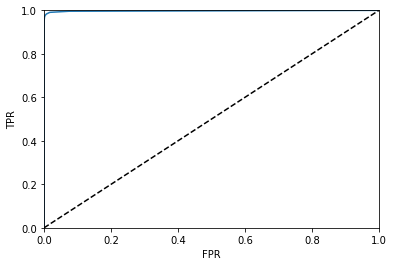

In [24]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_1,y_probas_forest[:, 1])
plt.plot(fpr_forest, tpr_forest)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.show()

In [25]:
y_1_pred_rf = cross_val_predict(forest_clf, X, y_1, cv=5)
print(f'ROC-AUC score for our RF model is: {roc_auc_score(y_1, y_1_pred_rf)}')

ROC-AUC score for our RF model is: 0.9792898653354887


This model gives us slighlty less ROC-AUC score than SGD

### Comparing Models

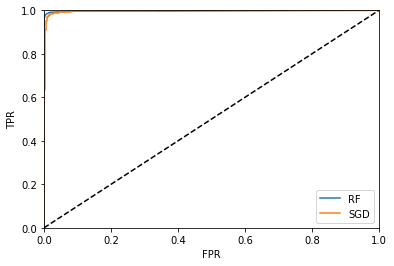

In [26]:
plt.plot(fpr_forest, tpr_forest, label='RF')
plt.plot(fpr, tpr, label='SGD')
plt.plot([0, 1], [0, 1], 'k--')

plt.ylabel('TPR')
plt.xlabel('FPR')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.legend(loc="lower right")

plt.show()

Both models are quite comparable

## Multi-Class Classification

### SGD Classifier

In [27]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y)

sgd_clf.predict([digit])

array([1])

The predicition is right!

In [29]:
digit_scores = sgd_clf.decision_function([digit])
digit_scores

array([[-77303.93019077,  18899.04119503,  -6366.23354936,
         -4258.77930324, -24019.30119466,  -8581.95096188,
         -5443.11710794, -10594.537209  ,  -4179.07632056,
         -8618.90129962]])

We get 10 decision scores because SGD classifier trained 10 models according to OnevAll approach under the hood.

In [30]:
cv_scores = cross_val_score(sgd_clf, X, y, cv=5, scoring="accuracy")
print(np.mean(cv_scores))

0.8742616053409054


We got an accuracy of 87.42% in case of multi-class classification which is very good.

#### Column Standardization

In [37]:
# trying to improve the accuracy of model by column standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cv_scores = cross_val_score(sgd_clf, X_scaled, y, cv=5, scoring="accuracy", n_jobs=-1, verbose=5)

print(f'Accuracy with column standardization is {np.mean(cv_scores)}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.8min remaining:  5.7min


Accuracy with column standardization is 0.9087622549511313


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished


Accuracy has improved by 2.5% with standardization.

#### Confusion Matrix

In [46]:
y_scaled_pred = cross_val_predict(sgd_clf, X_scaled, y, cv=5)
cnf_matrix = confusion_matrix(y, y_scaled_pred)
cnf_matrix

array([[3933,    0,    8,    8,    7,   41,   37,    3,   93,    2],
       [   0, 4488,   24,   20,    1,   29,    5,    6,  105,    6],
       [  16,   18, 3725,   69,   51,   19,   41,   37,  192,    9],
       [  14,   16,   89, 3784,    2,  168,   25,   28,  176,   49],
       [   9,   11,   35,    8, 3672,   11,   25,   24,  134,  143],
       [  26,   14,   20,  130,   42, 3219,   50,   15,  225,   54],
       [  26,    9,   33,    2,   29,   65, 3904,    3,   65,    1],
       [  17,   14,   47,   21,   26,    8,    3, 4019,   71,  175],
       [  16,   44,   29,   71,    3,   91,   17,    7, 3745,   40],
       [  18,   15,   16,   47,  109,   32,    0,  118,  154, 3679]])

This Confusion Matrix gives us a very clear picture of how our classifier is performing.

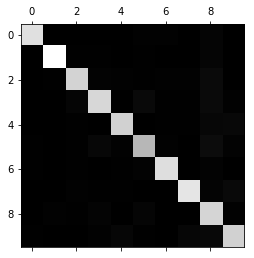

In [47]:
plt.matshow(cnf_matrix, cmap=plt.cm.gray)
plt.show()

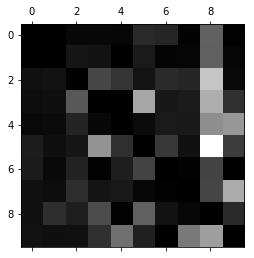

In [48]:
# Error Plot
row_sums = cnf_matrix.sum(axis=1, keepdims=True)
norm_cnf_matrix = cnf_matrix / row_sums

np.fill_diagonal(norm_cnf_matrix, 0)
plt.matshow(norm_cnf_matrix, cmap=plt.cm.gray)
plt.show()

1. We can particularly see that column 8 is very bright, meaning that many images are mis classified as 8
2. Entry at (5,8) is brightest which gives us further evidence that images of class 5 are misclassified as 8 alot.
3. Entries at (5,3) and (3,5) are also bright giving us further patterns in misclassification

### Random Forest Classifier

In [31]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X, y)

forest_clf.predict([digit])

array([1])

Predicition is right.

In [32]:
cv_scores_rf = cross_val_score(forest_clf, X, y, cv=5, scoring="accuracy")
print(np.mean(cv_scores_rf))

0.9389763275819893


RF classifier gives us a much better accuracy of 93.9%. 

#### Column Standardization

In [39]:
# trying to improve the accuracy of model by column standardization
cv_scores_rf = cross_val_score(forest_clf, X_scaled, y, cv=5, scoring="accuracy", n_jobs=-1, verbose=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


In [40]:
print(f'Accuracy with column standardization is {np.mean(cv_scores_rf)}')

Accuracy with column standardization is 0.9388573281202207


RF classifier is not improved with standardization.

#### Confusion Matrix

In [43]:
y_scaled_pred_rf = cross_val_predict(forest_clf, X_scaled, y, cv=5)
cnf_matrix_rf = confusion_matrix(y, y_scaled_pred_rf)
cnf_matrix_rf

array([[4043,    0,    9,    4,    5,   14,   29,    1,   25,    2],
       [   1, 4604,   19,   13,    8,    7,    8,    7,   11,    6],
       [  35,   20, 3945,   33,   22,   11,   24,   37,   40,   10],
       [  21,   13,   92, 3999,    8,   89,   10,   34,   62,   23],
       [  11,   14,   26,    9, 3848,    6,   21,   13,   18,  106],
       [  36,   11,   19,  151,   24, 3449,   36,    9,   37,   23],
       [  41,    7,   30,    5,   20,   46, 3970,    0,   17,    1],
       [   4,   24,   80,   20,   43,    1,    1, 4141,   17,   70],
       [  22,   36,   74,   84,   48,   67,   29,    8, 3653,   42],
       [  29,   12,   24,   57,  128,   31,    7,   77,   43, 3780]])

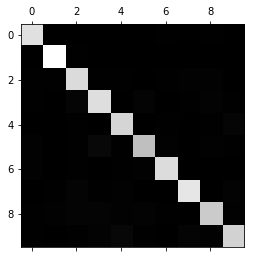

In [44]:
plt.matshow(cnf_matrix_rf, cmap=plt.cm.gray)
plt.show()

Most values are on diagnols which is a good sign for our classifier. Notice that diagnoal entry for class 1 is particularly very bright. There can be two reasons for this:
1. Data set contains alot of points that actually belong to class 1 (this can be verified from countplot of class distribution at starting of this notebook)
2. Classifier works very well for class 1 and classifies most these images correctly (this can be verified from confusion matrix above, indeed mis classified images of class 1 are less as compared to others)

## Future Outlook

1. Feature Engineering: Remove columns with all zeros and/or add a column with number of loops
2. KNN